In [ ]:
# Simple anomaly detection

In [ ]:
# Moving Average Using Discrete Linear Convolution

In [165]:
from __future__ import division
# from itertools import izip, count # to use zip directly in py3
import matplotlib.pyplot as plt
from numpy import linspace, loadtxt, ones, convolve
import numpy as np
import pandas as pd
import collections
from random import randint
from matplotlib import style
style.use('ggplot')
%matplotlib inline

In [166]:
# load the data
data = loadtxt("sunspots.txt", float)

In [167]:
# View the data as a table
data_df = pd.DataFrame(data, columns=['Months', 'SunSpots'])
data_df.head()

,Months,SunSpots
0,0.0,58.0
1,1.0,62.6
2,2.0,70.0
3,3.0,55.7
4,4.0,85.0


In [168]:
# define some User Defined Functions
def moving_average(data, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')

In [169]:
y=data_df['SunSpots']
window_size=12
avg = moving_average(y, window_size).tolist()
residual = y - avg
std = np.std(residual)


print(len(avg))

3143


In [170]:
avg=pd.DataFrame(avg, index=range(0,3143))
residual=pd.DataFrame(residual, index=range(0,3143))

avg.columns = ['avg']
avg.head()
residual.columns=['resid']
residual.head()

,resid
0,23.433333
1,20.133333
2,22.008333
3,1.383333
4,24.391667


In [171]:
data_all=pd.concat([data_df, avg, residual], axis=1)
data_all.head()

,Months,SunSpots,avg,resid
0,0.0,58.0,34.566667,23.433333
1,1.0,62.6,42.466667,20.133333
2,2.0,70.0,47.991667,22.008333
3,3.0,55.7,54.316667,1.383333
4,4.0,85.0,60.608333,24.391667


In [213]:
data_all['Outlier']=(data_all['resid']>std*3) | (data_all['resid']<-std*3)
data_all['Color']='black'

data_all.tail()
# np.mean(data_all['Color'].item=='red')
# data_all['Outlier']=pd.to_factor(data_all['Outlier'])

,Months,SunSpots,avg,resid,Outlier,Color
3138,3138.0,16.1,15.308333,0.791667,False,black
3139,3139.0,19.6,14.208333,5.391667,False,black
3140,3140.0,25.2,12.641667,12.558333,False,black
3141,3141.0,23.5,11.358333,12.141667,False,black
3142,3142.0,21.6,10.691667,10.908333,False,black


In [214]:
# plot the data, moving average and color the outlier points

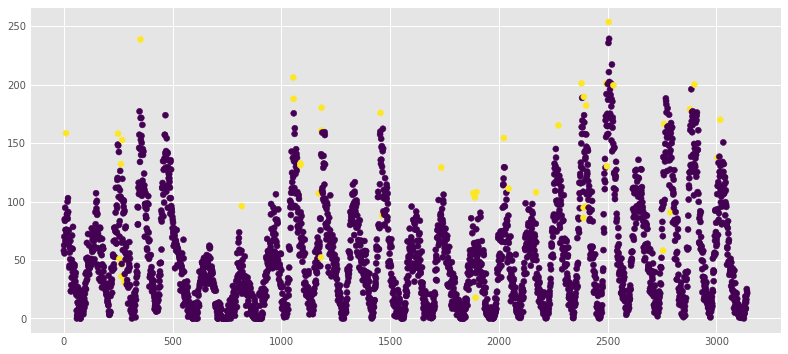

In [219]:
plt.figure(figsize=(12, 6))
#plt.plot(data_all['Months'], data_all['avg'], linestyle='--')
plt.scatter(data_all['Months'], data_all['SunSpots'], c=data_all['Outlier'])

In [ ]:
# to change the color for highlighting...
Reference : https://www.datascience.com/blog/python-anomaly-detection